In [ ]:
# Author: Enock Niyonkuru
# Class: Deep Learning
# Topics: 
# - Hugging Face Models
# - Natural Language Processing
# Date:  10 May 2022
# This project predicts emotions of a text

# **Deep_Learing Project NLP**

# **Tasks:**
Using the hugging face library, perform the follow tasks on the provided text inputs.
- Task 1: Emotion Classification on provided text input.
- Task 2: Entity Recognition on provided text input.
- Task 3: Summarize text from a book.
- Task 4: Generate text from given text.
- Task 5: Transfer and train a Hugging Face model.







**Note:** 

- Your score in this assignment will replace your lowest assignment score.
- Completing this assignment is optional.
- You will need a GPU for this exercise.

# **Check GPU**

In [2]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Not connected to a GPU')
    else:
      print(gpu_info)
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab
Wed May 11 07:01:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                               

In [3]:
# HIDE OUTPUT
!pip install transformers
!pip install transformers[sentencepiece]
!pip install datasets

     |████████████████████████████████| 4.0 MB 7.2 MB/s 
     |████████████████████████████████| 596 kB 58.1 MB/s 
     |████████████████████████████████| 6.6 MB 43.8 MB/s 
     |████████████████████████████████| 880 kB 47.7 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=192d469432efbbfb035da985e3d3c4529bf3ccc9a291c455b68b77f305293915
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 8.2 MB/s 
     |████████████████████████████████| 342 kB 9.9 MB/s 
     |████████████████████████████████| 136 kB 72.2 MB/s 
     |████████████████████████████████| 1.1 MB 25.2 MB/s 
     |███████████████████████████████

**Task 1: Emotion Classification**

Use model: `j-hartmann/emotion-english-distilroberta-base`. <br/>
Classify into one of basic emotions (Anger, Disgust, Fear, Joy, Neutral, Sadness, Surprise).


In [4]:
from urllib.request import urlopen

# Read sample text, a poem
URL = "https://www.gutenberg.org/cache/epub/23336/pg23336.txt"
f = urlopen(URL)
text = f.read().decode("utf-8")
text = text[5000:6024]                                 
size = len(text)                                               # For this model text size must be multiple of 512
model = 'j-hartmann/emotion-english-distilroberta-base'
print("Size of input",size)
print('Sample Text:'+ '\n'+ text[:100])


Size of input 1024
Sample Text:
watched him whirling about
and cracking his nuts, and he longed to have one of his own; so he
buil


In [5]:
# HIDE OUTPUT
import pandas as pd
from transformers import pipeline

classifier = pipeline("text-classification",model=model)
outputs = classifier(text)
pd.DataFrame(outputs)

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

,label,score
0,joy,0.755191




```
`# This is formatted as code`
```

**Task 2: Entity Recognition**


Use model: `bert-large-cased-finetuned-conll03-english`. <br/>
Request a "named entity recognizer" (ner) and processes the specified text to detect enitites in text such as location (LOC), organization (ORG), person (PER) or miscellaneous (MISC).

In [6]:
text2 = 'Seeks to Hire St. James Law as Legal Counsel. Oh by the way Rock Rocks!'
size = len(text2)                                               # For this model text size must be multiple of 512
model = 'dbmdz/bert-large-cased-finetuned-conll03-english'
print("Size of input",size)
print('Sample Text:'+ '\n'+ text2[:30])

Size of input 71
Sample Text:
Seeks to Hire St. James Law as


In [7]:
# HIDE OUTPUT
import pandas as pd
from transformers import pipeline

classifier = pipeline("ner",aggregation_strategy="simple",model=model) 
outputs = classifier(text2)
pd.DataFrame(outputs)

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

,entity_group,score,word,start,end
0,ORG,0.771996,St,14,16
1,PER,0.797805,James,18,23
2,ORG,0.885777,Law,24,27
3,ORG,0.440680,Rock,60,64
4,MISC,0.918391,Rocks,65,70



**Task 3: Summarize Story**

Summarize section of the Treasure Island book. Use model `sshleifer/distilbart-cnn-12-6`. <br/>

Your sumamry should be 100 words long and should not contain tokenzation stop words.


In [8]:
import requests 

r = requests.get("https://people.ucsc.edu/~cchakrab/data/treasure_island.txt")
model = 'sshleifer/distilbart-cnn-12-6'
raw_text = r.text.lower()
raw_text = raw_text[10000:12048]
print(len(raw_text))

2048


In [9]:
# HIDE OUTPUT
import pandas as pd
from transformers import pipeline

generator = pipeline("summarization",model=model)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [10]:
outputs = generator(raw_text)
#print(outputs[0]['summarization'])
outputs[0]

{'summary_text': ' "i\'m a plain man; rum and eggs is what i want, and that head up there for to watch the ships off," he said . "you can tell me when i\'ve worked through that," said the man, looking as fierce as a commander . e continued. "You mought call me captain. oh, i\'m a captain."'}

**Task 4: Generate text using seeds**

Generate 250 word pirate story using the Treasure Island book selected text as seed. 
Use model `gpt2`.

In [11]:
from urllib.request import urlopen

generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [12]:
outputs = generator(text, max_length=250)
print(outputs[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 336, but ``max_length`` is set to 250. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


watched him whirling about
and cracking his nuts, and he longed to have one of his own; so he
built a trap-cage, and set it near the great nut tree. He set it in
the morning, and then went to school, but he could not study much for
thinking of the trap. After school it did not take him long to visit
the old nut tree, and lo! there was a little squirrel in his trap; but
little squirry soon got away, as you see, and ran off to the woods,
happy enough to get his liberty again.




[Illustration]




THE SQUIRREL.


One pleasant summer morning
  A little boy was seen
Beneath a spreading oak tree
  Upon a village green.

And to a merry squirrel
  The child was heard to say--
"How is it, Mr. Muncher,
  You always are at play?"

"I laid up nuts, last autumn,
  So I can frolic now,"
Replied the merry squirrel,
  And frisked along the bough.

[Illustration]

"And you, my little school-boy,
  Must study all you can,
And lay up stores of knowledge,
  To use when you're a man."

"[


**Task 5: Transfer and train a Hugging Face model**

In this section, we will transfer and train a Hugging Face model. To achieve this training, we will use Hugging Face data sets, tokenizers, and pretrained models.

For this task, we will work with `ccdv/patent-classification` dataset and fine tune pretrained gpt2 model for classifying the patents into one of 9 categories. Please refer to the output of the cell below for checking out a sample patent and the labels.

In [3]:
# HIDE OUTPUT
from datasets import load_dataset

model = "gpt2"
patents = load_dataset("ccdv/patent-classification")

print(patents['train'][2])
print(patents['train'].features)

No config specified, defaulting to: patent_classification_dataset/patent


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset patent_classification_dataset downloaded and prepared to /root/.cache/huggingface/datasets/ccdv___patent_classification_dataset/patent/1.0.0/296a870cf0b6aa21c8cbd74f4fcd0dafdf4d7795cc2bba5ee2918ddd85225740. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

{'text': 'now , first and second embodiments of the present invention will be described below with reference to the accompanying drawings . in the following description of the drawings in the first and second embodiment , identical or similar constituents are designated by identical or similar reference numerals . fig1 is a view showing a wireless transceiver device according to a first embodiment of the present invention . as shown in fig1 , this embodiment includes a data processor 1 , a data transceiver 2 , a rf ( radio frequency ) unit 3 , and an antenna 4 . the data transceiver 2 includes a transmitter 5 and a receiver 6 . the data processor 1 is connected to the transceiver 2 . the data transceiver 2 is connected to the rf unit 3 . the rf unit 3 is connected to the antenna 4 . the data processor 1 is a circuit for processing digital format data , such as a digital processor or a dedicated communication chip . the transmitter 5 of the transceiver 2 is a circuit for converting digi

You may refer to the class lectures and `Notebook_11_Natural_Language_Processing.ipynb` for completing this section. <br/>Specifically, look for the section titled "Training Hugging Face Models". <br/>

**Note:** This step will take time for training and requires GPU.

In [4]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

In [6]:
import pandas as pd

patents.set_format(type='pandas')
df=patents["train"][:]
df[:5]

,text,label
0,"turning now to the drawings , there is shown i...",6
1,deployment mechanisms that are configured for ...,0
2,"now , first and second embodiments of the pres...",7
3,"as used herein , “ administration ” of a compo...",0
4,"in accordance with the figures , the mixing de...",8


In [7]:
def label_it(row):
  return emotions["train"].features["label"].int2str(row)

df['label_name'] = df["label"].apply(label_it)
df[:5]

,text,label,label_name
0,"turning now to the drawings , there is shown i...",6,Physics
1,deployment mechanisms that are configured for ...,0,Human Necessities
2,"now , first and second embodiments of the pres...",7,Electricity
3,"as used herein , “ administration ” of a compo...",0,Human Necessities
4,"in accordance with the figures , the mixing de...",8,General tagging of new or cross-sectional tech...


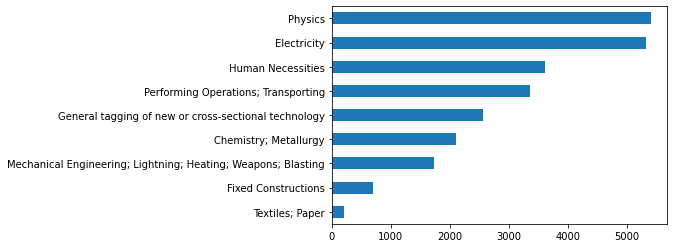

In [8]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.show()

In [9]:
from transformers import AutoTokenizer

def tokenize(rows):
  return tokenizer(rows['text'], padding=True, truncation=True)

model_ckpt = "distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

emotions.set_format(type=None)

encoded = tokenize(emotions["train"][:2])

print("**Input IDs**")
for a in encoded.input_ids:
  print(a)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

**Input IDs**
[101, 3810, 2085, 2000, 1996, 9254, 1010, 2045, 2003, 3491, 1999, 20965, 2487, 2019, 6377, 4984, 13717, 5604, 2291, 1999, 2029, 1037, 11375, 2030, 4984, 9563, 2385, 2003, 5614, 2006, 1037, 15083, 2324, 3850, 3468, 2000, 6819, 22008, 1996, 11375, 2104, 4758, 3785, 1010, 1041, 1012, 1043, 1012, 8254, 26658, 16975, 2135, 1010, 18154, 1010, 2030, 1037, 5257, 1997, 1996, 2048, 1012, 1996, 3563, 3252, 1997, 1996, 15083, 1998, 1996, 2965, 2005, 24987, 2009, 2024, 2124, 1999, 1996, 2396, 1998, 2947, 2025, 2582, 6936, 1012, 1996, 11375, 1998, 15083, 2024, 7431, 1999, 1037, 2701, 4574, 2322, 13557, 1996, 11375, 2104, 3231, 2064, 2022, 13532, 2000, 4860, 9670, 1010, 2593, 2894, 2030, 1999, 9595, 2007, 1996, 17880, 5604, 1012, 2019, 4483, 2491, 14709, 1010, 5393, 2012, 2570, 1010, 2003, 3024, 2005, 13228, 2135, 10808, 2030, 11520, 1996, 4574, 4592, 1012, 1037, 5830, 2484, 29103, 8539, 15083, 2324, 1010, 1998, 2947, 11375, 2385, 1010, 2007, 1037, 13717, 5604, 2604, 2656, 1012, 2009, 2

In [10]:
# HIDE OUTPUT
from datasets import load_dataset

emotions = load_dataset("emotion")

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
# HIDE OUTPUT
from transformers import AutoTokenizer

def tokenize(rows):
  return tokenizer(rows['text'], padding="max_length", truncation=True)

model_ckpt = "distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

emotions.set_format(type=None)

tokenized_datasets = emotions.map(tokenize, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [12]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

In [13]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42)
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42)

In [14]:
tf_train_dataset = small_train_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = small_eval_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

In [15]:
# HIDE OUTPUT
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(\
    "distilbert-base-uncased", num_labels=6) 

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_39', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

model.fit(tf_train_dataset, validation_data=tf_validation_dataset, \
          epochs=5)

Epoch 1/5
2000/2000 [==============================] - 987s 490ms/step - loss: 0.3806 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.1646 - val_sparse_categorical_accuracy: 0.9260
Epoch 2/5
2000/2000 [==============================] - 981s 491ms/step - loss: 0.1498 - sparse_categorical_accuracy: 0.9304 - val_loss: 0.1429 - val_sparse_categorical_accuracy: 0.9315
Epoch 3/5
2000/2000 [==============================] - 981s 490ms/step - loss: 0.1235 - sparse_categorical_accuracy: 0.9426 - val_loss: 0.1563 - val_sparse_categorical_accuracy: 0.9285
Epoch 4/5
2000/2000 [==============================] - 981s 490ms/step - loss: 0.1032 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.1648 - val_sparse_categorical_accuracy: 0.9235
Epoch 5/5
2000/2000 [==============================] - 981s 490ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.1957 - val_sparse_categorical_accuracy: 0.9245


In [1]:
print('Done!')

Done!
